In [147]:
# This cell initializes the interactive feedback cells.
# If you can see this cell, click on it, then run it! 
# If this cell is not run, the interactive feedback cells won't work!

import scipy as sp
from IPython.display import HTML

a_fi_t = ['a']*50
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

interactive_cell = '0'
HTML('''<script> code_show=true;  function code_toggle() {   if (code_show) {     $(\'div.input\').each(function(id) {       el = $(this).find(\'.cm-variable:first\');       if (id == 0 || el.text() == \'interactive_cell\') {         $(this).hide();       }     });     $(\'div.output_prompt\').css(\'opacity\', 0);   } else {     $(\'div.input\').each(function(id) {       $(this).show();     });     $(\'div.output_prompt\').css(\'opacity\', 1);   }   code_show = !code_show }  $( document ).ready(code_toggle); </script> <form action="javascript:code_toggle()">''')

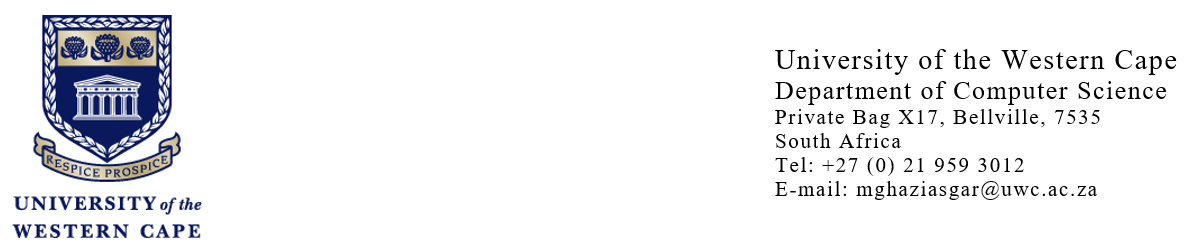

# CSC311 – Machine Learning – Linear Regression 2020

# Assignment 1

This is the first assignment of the course and is the only assignment that will be given in my part (Linear Regression). **Extremely important note:** You HAVE to run this notebook with a **Python 3 kernel**; running it with a Python 2 kernel will yield very unpredictable results, and your potentially correct solutions may be marked as being wrong because of this fact. So make sure to run it with a **Python 3 kernel**. I've prepared this interactive notebook for you. The notebook gives you tasks to do which involve, in most or all cases, filling out the body of a function that does something specific, and after each task that is to be marked (except for the plotting questions), I've provided a feedback cell that you can select and run that will provide you with instant feedback about whether your work appears to be doing the right thing just to give you a sense of your progress for your personal benefit. Essentially, the feedback cells call the function that you will have to fill out with code and check to see whether the output is correct.

When you first opened the notebook, you will most likely have seen a cell with code **right at the top of the notebook** that looks something like the below image:

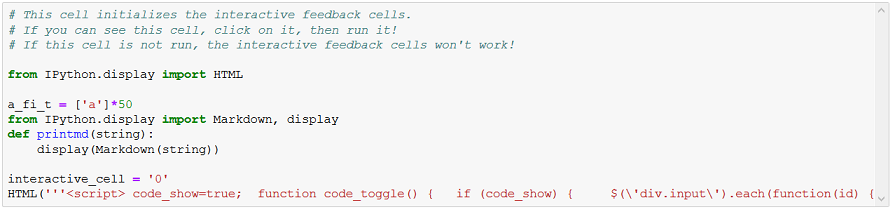

***
**VERY IMPORTANT**
That cell contains crucial code that initializes the interactive feedback cells and makes them function correctly. **The very first thing you need to do everytime that you open your notebook if the code in that cell is showing is to click on that cell and run it**. If the code is not showing then it has most likely been run already. If the code **is** showing, you need to click on it and run it. If you don't, you will notice that the interactive feedback cells will throw errors and won't work correctly.
***

Please note that the interative feedback cells **do not update automatically**. They only execute (and update) once you run them. So you can either select a specific cell after a problem and run it, or you can run all the cells. Either way, after every change, you will need to run the relevant feedback cell(s) to check your progress. 

Also note that if you haven't completed a task yet at all, running the interactive feedback cell below it will throw an error. This is, for example, because (amongst other things) it calling a function that you should have completed that hasn't been completed yet. So if that happens, now you know why. If things get messy, you can always clear the output cells to clean things up. You can do this by means of the ```Cell``` $\rightarrow$ ```All Output``` $\rightarrow$ ```Clear``` menu entry. Don't worry: this won't delete any of your code, but only the output that has been produced by running that code.

You need to work on this sheet from the top going sequentially down. In many (probably all) cases, cells lower down depend on functions/variables created and correctly set higher up in the sheet. This will prevent confusion and will help ensure that the notebook works correctly.

Make 100% sure to NOT hard-code values for the data sets you've been given here and also to follow the instructions very carefully. This includes things like the number of samples (```m```) and, for multivariate linear regression, the number of features. Use this assignment as an opportunity to learn and apply everything you’ve learnt in class. Ok, now on to the assignment.

The assignment consists of two parts with two different data sets. The first part deals with univariate (simple) linear regression while the second part delves into multivariate linear regression. Follow the progression of the sheet to unravel the wonders of linear regression.

Note that for the rest of this assignment, I've  clearly indicated the parts that will earn you marks by putting in a **[x marks]** just after the question. In most or all such code cells that you need to fill in, I've provided a template function that you need to complete, and I've also indicated the parts where you need to put in code to make things work; only make changes to the code between the two comment tags that say **```#Fill in below```** and **```#Stop filling in here```**.  **Don't** make any edits to function templates/declarations/inputs or even to the return statements. My auto-marker will assume the function names, input variables and return variables that are provided below. Only edit the body of the function in each part of the assignment. Please also read the instructions very carefully as some questions may work slightly differently, but the instructions are always clearly given.

Also note that my data loading cells assume that the two files ```data1.csv``` and ```data2.csv``` are in the same directory as this notebook. These files have also been uploaded to iKamva along with this sheet. Download and place in the appropriate folder.

#### Submission:

You willsubmit your finished jupyter notebook (```.ipynb```) file to iKamva before the deadline.

Please adhere to the following very simple instructions when making a submission:

1. Before submission, please rename your jupyter notebook file from the original "CSC311 - Assignment 1 - Linear Regression.ipynb" to "**STUDENTNUMBER**CSC311 - Assignment 1 - Linear Regression.ipynb" i.e. include your student number at the beginning of the filename.


2. **DO NOT** upload the data files (```data1.csv``` and ```data2.csv```) as part of your submission. Only upload your jupyter notebook (```.ipynb```) file.


3. **DO NOT** compress or zip your file in anyway. Upload the original raw ```.ipynb``` file.


4. If your submission is late, even by a few moments, it will not be accepted. I've given you plenty time to submit this work so please aim to **submit 24 hours before the deadline** to avoid disappointments to do with e.g. lack of Internet connectivity in res, load-shedding, tsnamis and other natural disasters, corona virus, etc. There is absolutely no excuse that will be accepted, given the amount of time I've given you. If your work is late, please refrain from emailing it to me, and please also refrain from coming to my office to plead; I will **not** accept your work; period.


Good luck and enjoy this notebook (which took me a **LOT** of time to create)!

# Part 1 - Univariate (Simple) Linear Regression

A fast-food chain currently has branches in a number of different cities. They have collected data about the population of each city that they have a branch in, along with the total profit (which could also be a negative value - indicating a loss) they have made in that city. They would like to be able to make decisions about which cities to extend a branch to next. In this part, you're going to use linear regression to obtain a model that can predict the total profit based on the population of the city.

### Reading in and Readying the Data

The first step is to read in the data. The data for this part is provided in a ```csv``` file called ```data1.csv``` which contains two columns of data: the first column represents city population in 10s of thousands of people; the second column represents total profit in 10s of thousands of dollars. I've graciously put in the code to import ```numpy``` and to import the data as a ```numpy``` array into the variable ```data``` (because the focus here is on machine learning, not on data import).

In [148]:
#Run this snippet before moving on to the next parts
#Don't change anything in this code snippet. But do look through it to see what it's doing.

import numpy as np
data = np.genfromtxt('data1.csv')

The data file consists of two columns. The data is displayed below to demonstrate that it is read in correctly.

In [149]:
data

array([[ 6.1101 , 17.592  ],
       [ 5.5277 ,  9.1302 ],
       [ 8.5186 , 13.662  ],
       [ 7.0032 , 11.854  ],
       [ 5.8598 ,  6.8233 ],
       [ 8.3829 , 11.886  ],
       [ 7.4764 ,  4.3483 ],
       [ 8.5781 , 12.     ],
       [ 6.4862 ,  6.5987 ],
       [ 5.0546 ,  3.8166 ],
       [ 5.7107 ,  3.2522 ],
       [14.164  , 15.505  ],
       [ 5.734  ,  3.1551 ],
       [ 8.4084 ,  7.2258 ],
       [ 5.6407 ,  0.71618],
       [ 5.3794 ,  3.5129 ],
       [ 6.3654 ,  5.3048 ],
       [ 5.1301 ,  0.56077],
       [ 6.4296 ,  3.6518 ],
       [ 7.0708 ,  5.3893 ],
       [ 6.1891 ,  3.1386 ],
       [20.27   , 21.767  ],
       [ 5.4901 ,  4.263  ],
       [ 6.3261 ,  5.1875 ],
       [ 5.5649 ,  3.0825 ],
       [18.945  , 22.638  ],
       [12.828  , 13.501  ],
       [10.957  ,  7.0467 ],
       [13.176  , 14.692  ],
       [22.203  , 24.147  ],
       [ 5.2524 , -1.22   ],
       [ 6.5894 ,  5.9966 ],
       [ 9.2482 , 12.134  ],
       [ 5.8918 ,  1.8495 ],
       [ 8.211

Fill in code in the function template below that accepts, as input, ```data```, and returns the number of data items ```m``` and the number of features ```n```, respectively. This function will be marked. For your own purposes, feel free to display ```m``` and ```n``` with something like:<br>
"The number of data samples is _".<br>
"The number of features is _".

**[0.5 marks]**

In [150]:
def getMandNPart1(data):
    #Fill in below
    m = data.shape[0]  #returns the dimensions of the array of m
    n = data.shape[1]-1 #returns the dimensions of the array of (n) then subtracting (-1)
    
    #Stop filling in here
    return m,n

m,n = getMandNPart1(data)
print("The number of data samples is ",m) # prints the data samples
print("The number of features is ",n) # prints the #of features


The number of data samples is  97
The number of features is  1


Select and run the cell below to see whether your code working correctly. The cell below indicates whether your ```m``` and ```n``` apparently have the correct values at this point. Note that if you're running this the first time or if you've cleared all output, the cell below may appear "invisible", but its there: it's just very thin (height-wise). You can click on this cell and use the down arrow to select it. Then run it.

In [151]:
#If you can see this cell, then interactive feedback
#has not been activated and this cell will most
#likely not work. Please run the very first cell
#at the top of this notebook to activate interactive 
#mode. You may also read through the instructions in
#the very first section right at the top of the
#worksheet which tells you how to run the first cell.
interactive_cell
printmd("***")

m,n = getMandNPart1(data)
ans = getMandNPart1(data)
labs = ["m","n"]
corr = [97,1]
pnos = [0,1]

a_fi_t[pnos[0]] = 'a'
a_fi_t[pnos[1]] = 'a'

try:
    for ind,it in enumerate(corr):
        if round(ans[ind],1)==it:
            printmd("### Your value for "+labs[ind]+" seems correct.")
            a_fi_t[pnos[ind]] = 'b'
        else:
            printmd("### Your value for "+labs[ind]+" seems INCORRECT. Re-visit.")
            a_fi_t[pnos[ind]] = 'a'
except:
    printmd("###Something went wrong. Check your function.")
    
    
    
printmd("***")

***

### Your value for m seems correct.

### Your value for n seems correct.

***

Now fill in the function template with the numpy code below to set variables ```X``` and ```y``` as the first and last columns of the data respectively. You can do this by indexing into the array ```data```, noting that using a colon "```:```" in place of an index means "all". For example, for an array called A, saying ```A[:,:]``` means all columns and all rows (basically the whole array), and ```A[:,0]``` means all rows of only column index 0. Need I say more? Once you've set the two variables, feel free to call the function and check to make sure that you've done it correctly.<br><br>Note: When indexing, ensure that you don't necessarily assume that the price is the 2nd column, but that it is the last column (i.e. column number ```n```).

**[0.5 mark]**

In [152]:
def getXandyPart1(data,n):
    #Fill in below
    X = data[:,:1] #takes all rows of column index up to 1
    y = data[:,n] #takes all rows of column index n
    #Stop filling in here
    return X,y

X,y = getXandyPart1(data,n)


Select and run the cell below to see whether you've (apparently) set X and y correctly. Note that if you're running this the first time or if you've cleared all output, the cell below may appear "invisible", but its there: it's just very thin (height-wise). You can click on this cell and use the down arrow to select it. Then run it.

In [153]:
#If you can see this cell, then interactive feedback
#has not been activated and this cell will most
#likely not work. Please run the very first cell
#at the top of this notebook to activate interactive 
#mode. You may also read through the instructions in
#the very first section right at the top of the
#worksheet which tells you how to run the first cell.
interactive_cell
printmd("***")
X,y = getXandyPart1(data,n)
if type(X)!=type(0):
    X = X.reshape(X.shape[0],1)
if type(y) != type(0):
    y = y.reshape(y.shape[0],1)
ans = getXandyPart1(data,getMandNPart1(data)[1])



labs = ["X","y"]
corr = [sp.matrix([[ 6.1101],[ 5.5277],[ 8.5186],[ 7.0032],[ 5.8598],[ 8.3829],[ 7.4764],[ 8.5781],[ 6.4862],[ 5.0546],[ 5.7107],[14.164 ],[ 5.734 ],[ 8.4084],[ 5.6407],[ 5.3794],[ 6.3654],[ 5.1301],[ 6.4296],[ 7.0708],[ 6.1891],[20.27  ],[ 5.4901],[ 6.3261],[ 5.5649],[18.945 ],[12.828 ],[10.957 ],[13.176 ],[22.203 ],[ 5.2524],[ 6.5894],[ 9.2482],[ 5.8918],[ 8.2111],[ 7.9334],[ 8.0959],[ 5.6063],[12.836 ],[ 6.3534],[ 5.4069],[ 6.8825],[11.708 ],[ 5.7737],[ 7.8247],[ 7.0931],[ 5.0702],[ 5.8014],[11.7   ],[ 5.5416],[ 7.5402],[ 5.3077],[ 7.4239],[ 7.6031],[ 6.3328],[ 6.3589],[ 6.2742],[ 5.6397],[ 9.3102],[ 9.4536],[ 8.8254],[ 5.1793],[21.279 ],[14.908 ],[18.959 ],[ 7.2182],[ 8.2951],[10.236 ],[ 5.4994],[20.341 ],[10.136 ],[ 7.3345],[ 6.0062],[ 7.2259],[ 5.0269],[ 6.5479],[ 7.5386],[ 5.0365],[10.274 ],[ 5.1077],[ 5.7292],[ 5.1884],[ 6.3557],[ 9.7687],[ 6.5159],[ 8.5172],[ 9.1802],[ 6.002 ],[ 5.5204],[ 5.0594],[ 5.7077],[ 7.6366],[ 5.8707],[ 5.3054],[ 8.2934],[13.394 ],[ 5.4369]]),
       sp.matrix([[17.592 ],[ 9.1302],[13.662 ],[11.854 ],[ 6.8233],[11.886 ],[ 4.3483],[12.],[ 6.5987],[ 3.8166],[ 3.2522],[15.505 ],[ 3.1551],[ 7.2258],[ 0.71618],[ 3.5129],[ 5.3048],[ 0.56077],[ 3.6518],[ 5.3893],[ 3.1386],[21.767 ],[ 4.263 ],[ 5.1875],[ 3.0825],[22.638 ],[13.501 ],[ 7.0467],[14.692 ],[24.147 ],[-1.22],[ 5.9966],[12.134 ],[ 1.8495],[ 6.5426],[ 4.5623],[ 4.1164],[ 3.3928],[10.117 ],[ 5.4974],[ 0.55657],[ 3.9115],[ 5.3854],[ 2.4406],[ 6.7318],[ 1.0463],[ 5.1337],[ 1.844 ],[ 8.0043],[ 1.0179],[ 6.7504],[ 1.8396],[ 4.2885],[ 4.9981],[ 1.4233],[-1.4211],[ 2.4756],[ 4.6042],[ 3.9624],[ 5.4141],[ 5.1694],[-0.74279],[17.929 ],[12.054 ],[17.054 ],[ 4.8852],[ 5.7442],[ 7.7754],[ 1.0173],[20.992 ],[ 6.6799],[ 4.0259],[ 1.2784],[ 3.3411],[-2.6807],[ 0.29678],[ 3.8845],[ 5.7014],[ 6.7526],[ 2.0576],[ 0.47953],[ 0.20421],[ 0.67861],[ 7.5435],[ 5.3436],[ 4.2415],[ 6.7981],[ 0.92695],[ 0.152 ],[ 2.8214],[ 1.8451],[ 4.2959],[ 7.2029],[ 1.9869],[ 0.14454],[ 9.0551],[ 0.61705]])]
pnos = [2,3]

a_fi_t[pnos[0]] = 'a'
a_fi_t[pnos[1]] = 'a'

try:
    for ind,it in enumerate(corr):
        if sp.array_equal(it,ans[ind].reshape(ans[ind].shape[0],1)):
            printmd("### Your value(s) for "+labs[ind]+" seem(s) correct.")
            a_fi_t[pnos[ind]] = 'b'
        else:
            printmd("### Your value(s) for "+labs[ind]+" seem(s) INCORRECT. Re-visit.")
            a_fi_t[pnos[ind]] = 'a'
except:
    printmd("### Something went wrong. Check your function.")
    
    
    
printmd("***")

***

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:29: DeprecationWarning: scipy.array_equal is deprecated and will be removed in SciPy 2.0.0, use numpy.array_equal instead


### Your value(s) for X seem(s) correct.

### Your value(s) for y seem(s) correct.

***

### Plotting Data

Ok now that we have the data (or some of it) available, let's make a plot. Plotting data can come in handy, but as discussed in class, can only really be applied when you've got a single feature. Use the two vectors ```X``` and ```y``` to plot a scatter plot of Profit versus Population below. Preferably use``` matplotlib``` to do it. Search engines are your friend (preferably the ones that don't spy on you). Note: I've plotted some graphs further below in this worksheet. Maybe you can use those to help you...

**[2.5 marks]**

**Important: Don't modify ```X``` and ```y``` in any way.**

If you did it correctly, you should see a plot that is somewhat similar to the Figure below:

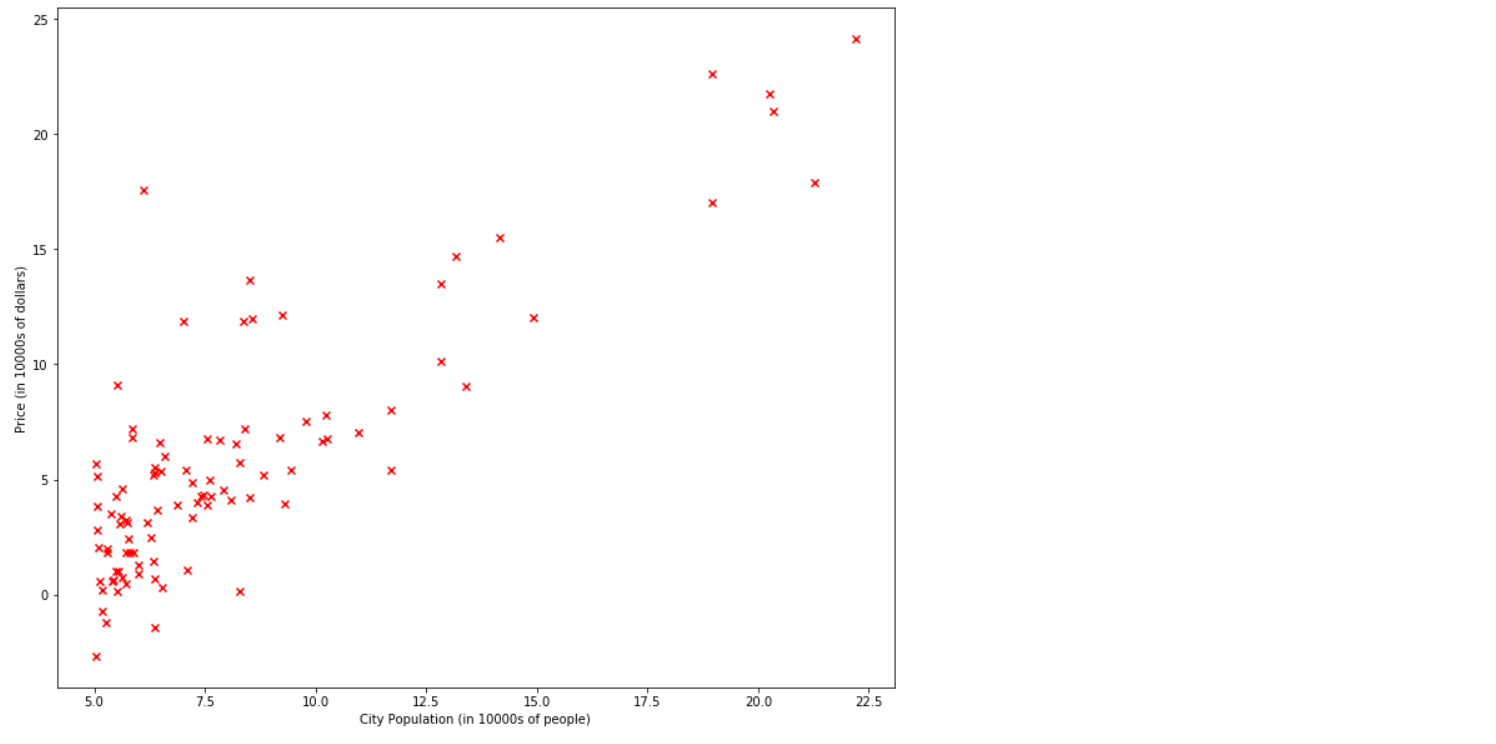

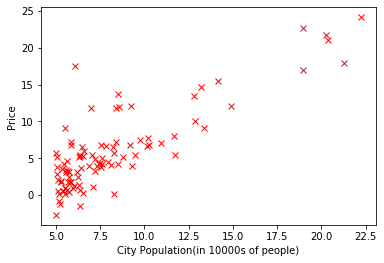

In [154]:
#Fill in below Import any libraries you may need for plotting inside the function here
import matplotlib.pyplot as plt

#Stop filling in here


def plotData(X,y):
    #Fill in below
    
    plt.xlabel("City Population(in 10000s of people)") #plot x-axis label
    plt.ylabel("Price") # plot y-axis lable
    plt.plot(X,y, "xr") #plot the graph
    plt.show() #show graph

    #Stop filling in here
    
    return
    
plotData(X,y)

Hopefully you can see that the data is more or less linear. Next, we're going to start to fit a line to the data.

### Adding Feature $\large x_0$

Here, I'm going to create a modified ```X``` that includes a columns of 1s that represent feature $x_0$:


In [155]:
#Don't change in any way
#If you've set X correctly then move into if block
X_mod = 0
if np.shape(X) == (m,1):
    X_mod = np.hstack([np.ones((m,1)),X]) #Add a column of 1s to X which will serve as the so-called x_0 feature: store the result in X_mod which we'll be using from now on

### Computing the Cost

Now we're going to write two functions that take in the column vectors X and y, as well as a vector thetas and compute the (current) cost given the data and the (current) theta values. Note that the cost is given by:

<center>$\large J(\Theta)=\frac{1}{2m}\sum\limits_{i=0}^{m}\Big[h_\theta(x) - y\Big]^2$</center>

where $h_\theta(x)$ in this univariate case is given by:

<center>$\large h_\theta(x) = \theta_1x + \theta_0$</center>

so the cost function can also be written as:

<center>$\large J(\Theta)=\frac{1}{2m}\sum\limits_{i=0}^{m}\Big[\theta_1x + \theta_0 - y\Big]^2$</center>

There are two ways we can go about computing the cost.

#### First Way - Iterative Solution (Slow)

One way to compute the cost is to loop over each of the $m$ samples $(x^{(i)},y^{(i)})$ and:
   - Compute $\theta_1x^{(i)} + \theta_0 - y^{(i)}$;
   - Square the result; 
   - Accumulate the sum of these values over all $m$ samples;
   - And finally divide the final sum by $2m$. 
This would work. You may be tempted to do it this way in practice, but iteration would be very slow, especially when given a large number of features and data samples.

Anyway, below, first go ahead and implement the **iterative solution** I've described above, in the ```costJIterative(X,y,thetas)``` function I've fleshed out below and make sure it returns the relevant cost as a single float value.

**[4 marks]**

In [156]:
def costJIterative(X, y, thetas):
    
    #Fill in below
    cost = 0.0 #cost is a float and setting it to 0.0
    for i in range(m): #iterating i, m number of times
        cost += (((thetas[1,0]*(X[i,1])) + (thetas[0,0]) - (y[i,0]))**2) #cost=cost+formula
    cost = (float)(cost/(2*m)) #casting cost as a float while dividing it by (2xm)
    return cost #the cost as a single value - consider using the float() function just before returning it
    #Stop filling in here


In [157]:
#This code snippet is for YOU
#It just calls the cost function. Feel free to play around with this to see what your cost function is doing.
tmpthetas = np.array([[-3.89],[1.19]]) #Change this to whatever thetas you like
costJIterative(X_mod, y, tmpthetas) #I wouldn't advise changing this

4.477219565919557

Now, I'll run the function you've written with the values $(\theta_0 = -3.89, \theta_1 = 1.19)$ (which are the approximate best-fit solutions to the data) and if you did it right, you should be seeing the value ```4.48``` in the cell **below**. If not, re-visit the function above. It needs to work correctly for the rest of this assignment to work correctly.

Select and run the cell below to see whether your code working correctly. Note that if you're running this the first time or if you've cleared all output, the cell below may appear "invisible", but its there: it's just very thin (height-wise). You can click on this cell and use the down arrow to select it. Then run it.

In [158]:
#If you can see this cell, then interactive feedback
#has not been activated and this cell will most
#likely not work. Please run the very first cell
#at the top of this notebook to activate interactive 
#mode. You may also read through the instructions in
#the very first section right at the top of the
#worksheet which tells you how to run the first cell.
interactive_cell
printmd("***")

pno = 4

corr = 4.48
try:
    X_mod = sp.hstack([sp.ones((m,1)),X])
    ans = round(costJIterative(sp.hstack([sp.ones((m,1)),X]),y,sp.matrix('-3.89;1.19')),2)

    printmd("### The test cost is " + str(ans))
    if (ans == corr):
        printmd("### Your iterative cost function seems to be correct!")
        a_fi_t[pno] = 'b'
    else:
        printmd("### Your iterative cost function seems to be wrong!")
        a_fi_t[pno] = 'a'

except:
    printmd("### Something went wrong. Re-visit.")
        
printmd("***")

***

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:15: DeprecationWarning: scipy.ones is deprecated and will be removed in SciPy 2.0.0, use numpy.ones instead
  from ipykernel import kernelapp as app
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:15: DeprecationWarning: scipy.hstack is deprecated and will be removed in SciPy 2.0.0, use numpy.hstack instead
  from ipykernel import kernelapp as app
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:16: DeprecationWarning: scipy.ones is deprecated and will be removed in SciPy 2.0.0, use numpy.ones instead
  app.launch_new_instance()
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:16: DeprecationWarning: scipy.hstack is deprecated and will be removed in SciPy 2.0.0, use numpy.hstack instead
  app.launch_new_instance()


### The test cost is 4.48

### Your iterative cost function seems to be correct!

***

#### Second Way - Vectorized Solution (Fast)

So now you've got a taste of what it's about with the iterative solution, but from now on we'll only use the vectorized solution described in this section. The second (far better) way of doing the exact same thing using matrix multiplication is to express the cost function as a set of matrix operations given by:

$$\large
J(\theta) = \frac{1}{2m}(X\theta - y)^T(X\theta - y)
$$

This could be broken down as:

   - Compute the matrix expression $X\theta - y$, where $X$ and $y$ are the same matrices (arrays) we created earlier (with the same variable names) and $\theta$ is the same as the ```thetas``` variable we created. This has the effect of computing $\theta_1x^{(i)} + \theta_0 - y^{(i)}$ for all $m$ samples **in one (sweet) go**. Let's assume we store the result of this matrix operation in a variable called ```diffVals```.
   - Square all the results **and** add them up **in one (sweet) go** by multiplying the transpose ```diffVals```$^T$ by the original ```diffVals``` (order matters here). Let's assume we store the result of this squaring and summing operation in a variable called ```diffValsSquared```.
   - Finally, divide the result by $2m$. If need be, convert the type to a ```float```. Done.

Note that you wouldn't even require a loop here. Once you're used to it, this procedure would literally be between 1 and about 4 or 5 lines of code (I did it in 1 line). This would not only be much faster (because packages like numpy are highly optimized to carry out a large number of matrix multiplications very quickly), but also shorter and more intuitive once you get a feel for it. This method is also called the 'Vectorized' solution since we're only working with vectors and matrices, and not looping over any individual samples. Feel free to use your linear algebra knowledge to confirm that this would be exactly the same as the iterative solution, or just take my word for it ;). You can also use a search engine to get more info if need be. Anyway, below, now go ahead and implement the **vectorized solution** I've described above, in the ```costJ(X,y,thetas)``` function I've fleshed out below and make sure it returns the relevant cost as **a single float value** (and not an array containing only a single row and column, for example).

**[2.5 marks]**

In [159]:
def costJ(X, y, thetas):
    
    #Fill in below
    #declearing diffVals and setting it to the matrix mul of (X,thetas) and subtr by (y)
    diffVals = (dot(X, thetas)) - (y) 
    
    transpose_diffVals = np.transpose(diffVals) #transpose of diffVals
    #declearing diffValsSquared
    diffValsSquared = dot(transpose_diffVals, diffVals) #matrix mul of the (transpose and diffVals)
    
    cost = (float) (diffValsSquared/(2*m)) #casting cost as float and div (diffValsSquared) by (2xm)
    
    return cost #the cost as a single value - consider using the float() function just before returning it
    #Stop filling in here

In [160]:
#This code snippet is for YOU
#It just calls the cost function. Feel free to play around with this to see what your cost function is doing.
tmpthetas = np.array([[-3.89],[1.19]]) #Change this to whatever thetas you like
costJ(X_mod, y, tmpthetas) #I wouldn't advise changing this

4.477219565919556

Now as before, select and run the cell below to see whether your code working correctly. The cell runs the function you've written with the values $(\theta_0 = -3.89, \theta_1 = 1.19)$ and, again, if you did it right, you should be seeing the value ```4.48``` below. If not, re-visit your vectorized function above. Note that if you're running this the first time or if you've cleared all output, the cell below may appear "invisible", but its there: it's just very thin (height-wise). You can click on this cell and use the down arrow to select it. Then run it.

In [161]:
#If you can see this cell, then interactive feedback
#has not been activated and this cell will most
#likely not work. Please run the very first cell
#at the top of this notebook to activate interactive 
#mode. You may also read through the instructions in
#the very first section right at the top of the
#worksheet which tells you how to run the first cell.
interactive_cell
pno = 5
printmd("***")
corr = 4.48

try:

    ans = round(costJ(sp.hstack([sp.ones((m,1)),X]),y,sp.matrix('-3.89;1.19')),2)
    printmd("### The test cost is " + str(ans))

    if (ans == corr):
        printmd("### Your vectorized cost function seems to be correct!")
        a_fi_t[pno] = 'b'
    else:
        printmd("### Your vectorized cost function seems to be wrong!")
        a_fi_t[pno] = 'a'
        
except:
    printmd("### Something went wrong. Re-visit.")    
    
printmd("***")

***

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:15: DeprecationWarning: scipy.ones is deprecated and will be removed in SciPy 2.0.0, use numpy.ones instead
  from ipykernel import kernelapp as app
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:15: DeprecationWarning: scipy.hstack is deprecated and will be removed in SciPy 2.0.0, use numpy.hstack instead
  from ipykernel import kernelapp as app


### The test cost is 4.48

### Your vectorized cost function seems to be correct!

***

### Implementing Gradient Descent for One Variable

Now we'll move on to implementing gradient descent. In this case, we're going to keep making updates to $\theta_0$ and $\theta_1$. We *could* carry out a check to see whether the cost has reduced by less than some small value, but let's rather simply iterate a large number of times (```max_iterations```) and hope that that number of times will be enough to ensure convergence. As with the cost function, here we're going to carry out gradient descent in two ways: one with iteration (which will be painfully slow) and one with vectorization. Hopefully this will convince you 100% that vectorization is the way to go.

#### First Way - Iterative Solution (Very Very Slow)

Below I've fleshed out a function ```gradientDescentOneVarIterative(X, y, thetas, alpha, max_iterations)```. I've put in the main for loop; you have to fill in code into the for loop to update $\theta_0$ and $\theta_1$ simultaneously. Before the function returns, make sure to update the vector ```thetas``` with the final $\theta_0$ and $\theta_1$ values that your code has computed. You may also update the vector ```thetas``` in every iteration. It's up to you. This variable will be returned by the function. The two updates are given by:

$$
\large
\theta_0 \leftarrow \theta_0 - \frac{\alpha}{m}\sum\limits_{i=0}^{m}(\theta_1x^{(i)}+\theta_0 - y^{(i)})
$$
and
$$
\large
\theta_1 \leftarrow \theta_1 - \frac{\alpha}{m}\sum\limits_{i=0}^{m}\big[(\theta_1x^{(i)}+\theta_0 - y^{(i)})x^{(i)}\big]
$$

I've also put in some code to use the ```costJ``` function you created earlier to record the cost at each iteration into the ```J_hist``` list. Don't modify this in any way. Later, we will use this to plot the cost versus iteration to visualize convergence.

**[5 marks]**

In [162]:
def gradientDescentOneVarIterative(X, y, thetas, alpha, max_iterations):
    J_hist = []
    J_hist.append(costJ(X,y,thetas))
    for ite in range(max_iterations):
        #Don't modify the code above this point.
        #Fill in below
        #FILL IN Your code here. There SHOULD be a loop in here
        
        thetas = thetas.astype(np.float) #casting array thetas as float
        
        resultForTheta1 = 0.0 #declearing resultForTheta1 is a float and setting it to 0.0
        resultForTheta2 = 0.0 #declearing resultForTheta2 is a float and setting it to 0.0
        for i in range(m): #iterating i, m number of times
            #resultForTheta1 = resultForTheta1 + formula 
            resultForTheta1 += ((thetas[1,0]*(X[i,1])) + (thetas[0,0]) - (y[i,0]))
            #resultForTheta1 = resultForTheta2 + formula
            resultForTheta2 += ((thetas[1,0]*(X[i,1])) + (thetas[0,0]) - (y[i,0]))*X[i,1]
        
        #setting thetas[0,0] to formula
        thetas[0,0] = thetas[0,0] - (alpha/m) * (resultForTheta1)
        #setting thetas[1,0] to formula
        thetas[1,0] = thetas[1,0] - (alpha/m) * (resultForTheta2)
    
        #Don't modify the code below this point
        
        J_hist.append(costJ(X,y,thetas))
        
    return thetas, J_hist

In [163]:
#This code snippet is for YOU
#It just calls the gradient descent function. Feel free to play around with this to see what your function is doing.

tmpthetas = np.array([[-3.89],[1.19]]) #Change this to whatever thetas you like
tmpalpha = 0.001
tmpiters = 100 #Be careful about setting this too large with iterative gradient descent... it can take a LONG time to finish


gradientDescentOneVarIterative(X_mod, y, tmpthetas, tmpalpha, tmpiters) #I wouldn't advise changing this


(array([[-3.88986373],
        [ 1.19243874]]),
 [4.477219565919556,
  4.477180949584207,
  4.477148422341318,
  4.477121024022471,
  4.477097945864973,
  4.4770785066371985,
  4.477062132528641,
  4.47704834021104,
  4.477036722570543,
  4.477026936689707,
  4.477018693724587,
  4.477011750378066,
  4.477005901717734,
  4.477000975126278,
  4.4769968252058305,
  4.476993329485821,
  4.476990384807654,
  4.476987904279463,
  4.476985814711071,
  4.4769840544534105,
  4.476982571578645,
  4.476981322347272,
  4.476980269916916,
  4.476979383254752,
  4.476978636221426,
  4.476978006799399,
  4.4769774764430075,
  4.476977029530994,
  4.476976652905362,
  4.476976335482957,
  4.476976067928286,
  4.476975842377943,
  4.4769756522084725,
  4.476975491840851,
  4.476975356575792,
  4.4769752424550235,
  4.476975146144442,
  4.476975064835683,
  4.4769749961632295,
  4.476974938134569,
  4.4769748890713865,
  4.476974847560011,
  4.47697481240969,
  4.476974782617437,
  4.476974757338425,
 

Now as before, select and run the cell below to see whether your code working correctly. The cell calls your function. Since this method is iterative and slow, it only runs it over a small number of iterations (100). If you did it correctly, you should expect to see values of $\theta_0 \approx -0.57655, \theta_1 \approx 0.85958$. The cell will also tell you if this is the case. Note that if you're running this the first time or if you've cleared all output, the cell below may appear "invisible", but its there: it's just very thin (height-wise). You can click on this cell and use the down arrow to select it. Then run it.

In [164]:
#If you can see this cell, then interactive feedback
#has not been activated and this cell will most
#likely not work. Please run the very first cell
#at the top of this notebook to activate interactive 
#mode. You may also read through the instructions in
#the very first section right at the top of the
#worksheet which tells you how to run the first cell.
interactive_cell
pno = 6
printmd("***")
try:

    retthetas, retJ_hist = gradientDescentOneVarIterative(sp.hstack([sp.ones((m,1)),X]), y, sp.matrix('0;0'), 0.01, 100)

    corrthetas = (round(retthetas[0,0],2) == -0.58 and round(retthetas[1,0],2) == 0.86)
    corrJhists = (round(retJ_hist[1],2) == 6.74 and round(retJ_hist[-1],2) == 5.48)
    
    if (corrthetas == False):
        printmd("### Seems like your iterative gradient descent function produces INCORRECT theta values. Re-visit.")
        a_fi_t[pno] = 'a'
    if (corrJhists == False):
        printmd("### Seems like you've modified my code that generates J_hists. It doesn't seem to be generating correct J_hist values anymore. Revert back to my code.")
        a_fi_t[pno] = 'a'
 
    if (corrthetas == True and corrJhists == True):
        printmd("### Seems like your iterative gradient descent function is working correctly. The thetas determined over this number of iterations was:")
        printmd("### "+",".join([str([round(it[0],7)]) for it in retthetas.tolist()]))
        a_fi_t[pno] = 'b'
    
except:
    
    printmd("### Seems like something went wrong with your iterative gradient descent. Re-visit.")
    a_fi_t[pno] = 'a'
printmd("***")

***

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:13: DeprecationWarning: scipy.ones is deprecated and will be removed in SciPy 2.0.0, use numpy.ones instead
  del sys.path[0]
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:13: DeprecationWarning: scipy.hstack is deprecated and will be removed in SciPy 2.0.0, use numpy.hstack instead
  del sys.path[0]


### Seems like your iterative gradient descent function is working correctly. The thetas determined over this number of iterations was:

### [-0.5765562],[0.8595815]

***

#### Second Way - Vectorized Solution (Incredibly Fast)

Below I've again fleshed out a function ```gradientDescentVectorized(X, y, thetas, alpha, max_iterations)``` for you. I've put in the main for loop; you have to fill in code into the for loop to update $\theta_0$ and $\theta_1$ simultaneously. As before, your code goes in the main for loop that carries out iterations of updates. In this case, however, you shouldn't loop through any individual data samples. Rather, you should use matrix operations to update $\theta_0$ and $\theta_1$. The update process can be expressed as the matrix operations:

$$
\large
\Theta = \Theta - \frac{\alpha}{m}X^T(X\Theta - y)
$$

where $\Theta$ is a vector of ($\theta_0$, $\theta_1$) values, $\alpha$ is the learning rate, $m$ is the number of data samples, $X$ is a matrix containing your features but also includes a column of 1s as the first column representing feature $x_0$, $X^T$ is the transpose of $X$ and $y$ is the vector of output/target values. If you want to, feel free to confirm for yourself that the expression above is exactly the same as carrying out the update equations given in the previous section.

**[2.5 marks]**

In [165]:
def gradientDescentVectorized(X, y, thetas, alpha, max_iterations):
    
    J_hist = []
    J_hist.append(costJ(X,y,thetas))

    for ite in range(max_iterations):
        
        #Don't modify the code above this point.
        
        #FILL IN Your code here - but there shouldn't be a loop in here
        
        transpose_X = np.transpose(X) #transpose of X
        
        X_dot_thetas = (dot(X, thetas)) #matrix mul of (X,thetas)
        #setting thetas to formula
        thetas = (thetas - (alpha/m) * dot(transpose_X, (X_dot_thetas - y)))
        
        
        #Don't modify the code below this point
        
        J_hist.append(costJ(X,y,thetas))
        
    return thetas, J_hist


In [166]:
#This code snippet is for YOU
#It just calls the gradient descent function. Feel free to play around with this to see what your function is doing.
tmpthetas = np.array([[-3.89],[1.19]]) #Change this to whatever thetas you like
tmpalpha = 0.001
tmpiters = 100 #Feel free to go reasonably large with vectorized version...
gradientDescentVectorized(X_mod, y, tmpthetas, tmpalpha, tmpiters) #I wouldn't advise changing this

(array([[-3.88986373],
        [ 1.19243874]]),
 [4.477219565919556,
  4.477180949584207,
  4.477148422341318,
  4.477121024022471,
  4.477097945864973,
  4.4770785066371985,
  4.477062132528641,
  4.47704834021104,
  4.477036722570543,
  4.477026936689707,
  4.477018693724587,
  4.477011750378066,
  4.477005901717734,
  4.477000975126278,
  4.4769968252058305,
  4.476993329485821,
  4.476990384807654,
  4.476987904279463,
  4.476985814711071,
  4.4769840544534105,
  4.476982571578645,
  4.476981322347272,
  4.476980269916916,
  4.476979383254752,
  4.476978636221426,
  4.476978006799398,
  4.4769774764430075,
  4.476977029530994,
  4.476976652905363,
  4.476976335482957,
  4.476976067928287,
  4.476975842377943,
  4.4769756522084725,
  4.476975491840852,
  4.476975356575792,
  4.4769752424550235,
  4.476975146144442,
  4.476975064835684,
  4.4769749961632295,
  4.476974938134569,
  4.4769748890713865,
  4.476974847560011,
  4.47697481240969,
  4.476974782617437,
  4.476974757338425,
 

Now as before, select and run the cell below to see whether your code is working correctly. The cell calls your function. Since this method is vectorized and fast, it runs it over a much larger number of iterations (10000). If you did it correctly, you should expect to see values of $\theta_0\ \approx -3.89578, \theta_1\approx 1.19303$. The cell will also tell you if this is the case. These are, in fact, the $\theta$ values that best fit the data. Note that if you're running this the first time or if you've cleared all output, the cell below may appear "invisible", but its there: it's just very thin (height-wise). You can click on this cell and use the down arrow to select it. Then run it.

In [167]:
#If you can see this cell, then interactive feedback
#has not been activated and this cell will most
#likely not work. Please run the very first cell
#at the top of this notebook to activate interactive 
#mode. You may also read through the instructions in
#the very first section right at the top of the
#worksheet which tells you how to run the first cell.
interactive_cell
pno = 7
printmd("***")
try:

    retthetas, retJ_hist = gradientDescentVectorized(sp.hstack([sp.ones((m,1)),X]), y, sp.matrix('0;0'), 0.01, 10000)

    corrthetas = (round(retthetas[0,0],4) == -3.8958 and round(retthetas[1,0],4) == 1.193)
    corrJhists = (round(retJ_hist[1],5) == 6.73719 and round(retJ_hist[-1],5) == 4.47697)
    
    if (corrthetas == False):
        printmd("### Seems like your vectorized gradient descent function produces INCORRECT theta values. Re-visit.")
        a_fi_t[pno] = 'a'
    if (corrJhists == False):
        printmd("### Seems like you've modified my code that generates J_hists. It doesn't seem to be generating correct J_hist values anymore. Revert back to my code.")
        a_fi_t[pno] = 'a'
 
    if (corrthetas == True and corrJhists == True):
        printmd("### Seems like your vectorized gradient descent function is working correctly. The thetas determined over this number of iterations was:")
        printmd("### " + ",".join([str([round(it[0],5)]) for it in retthetas.tolist()]))
        a_fi_t[pno] = 'b'
    
except:
    
    printmd("### Seems like something went wrong with your vectorized gradient descent. Re-visit.")
    a_fi_t[pno] = 'a'

printmd("***")

***

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:13: DeprecationWarning: scipy.ones is deprecated and will be removed in SciPy 2.0.0, use numpy.ones instead
  del sys.path[0]
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:13: DeprecationWarning: scipy.hstack is deprecated and will be removed in SciPy 2.0.0, use numpy.hstack instead
  del sys.path[0]


### Seems like your vectorized gradient descent function is working correctly. The thetas determined over this number of iterations was:

### [-3.89578],[1.19303]

***

### Plotting the Cost $J$ versus Iteration Number

Assuming you implemented gradient descent correctly and it works, there should now be a variable ```retJ_hist``` which contains the cost at each iteration of gradient descent. Plotting and observing this plot is key to determining if gradient descent is converging and whether the learning rate is: too small, too large, or just right.

In the code segment below, I've first made a call to your (vectorized) gradient descent function. Then, you need to  write the code to plot a graph of the cost $J$ versus the iteration number. All the data you will need is stored inside the variable ```retJ_hist```. Preferably use ```matplotlib```.

**[2 marks]**

To check that you're correct, given a learning rate of 0.001 and only 50 iterations in the function call below, your eventual graph should end up looking something like the figure below (but once you've got it right, feel free to change the learning rate to see the effect):

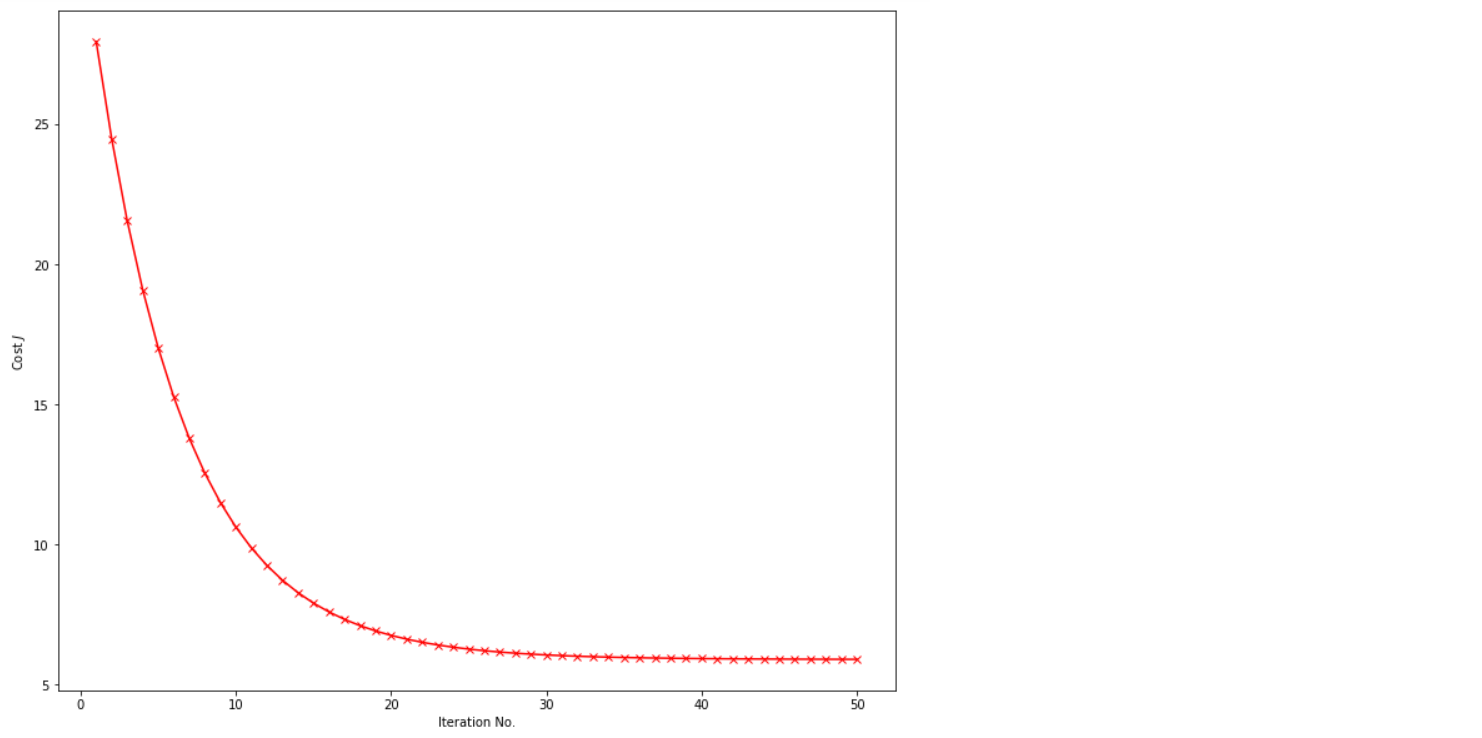

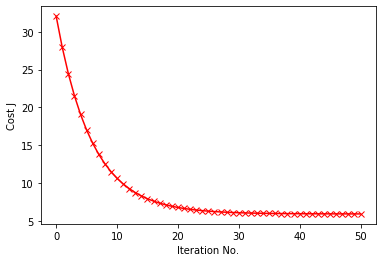

In [168]:
#Don't remove or modify the two lines below
thetas = np.array([[0],[0]]) #Creates a 2x1 column vector of zeros
retthetas, retJ_hist = gradientDescentVectorized(X_mod, y, thetas, 0.001, 50)  #Don't remove this, but feel free to change the learning rate


#Fill in below Import any libraries you may need for plotting inside the function here
import matplotlib.pyplot as plt

#Stop filling in here


def plotCostHistory(retJ_hist):
    #Fill in below
    
    plt.xlabel("Iteration No.") #x-axis label
    plt.ylabel("Cost J") #y-axis label
    plt.plot(retJ_hist, "r") #ploting line graph
    plt.plot(retJ_hist, "xr") #ploting x points
    plt.show() #show graph
    
    #Stop filling in here
    return
    
plotCostHistory(retJ_hist)

### Visualizing the Cost Function

Finally (in this part), we will display the cost function. I won't get you to do this. I've provided you the code below that generates a contour plot of the cost function for this data. Feel free to look through the code to see how it works. I'm not going to generate a 3D surface though. Feel free to make one yourself (not for marks).

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:39: DeprecationWarning: scipy.shape is deprecated and will be removed in SciPy 2.0.0, use numpy.shape instead


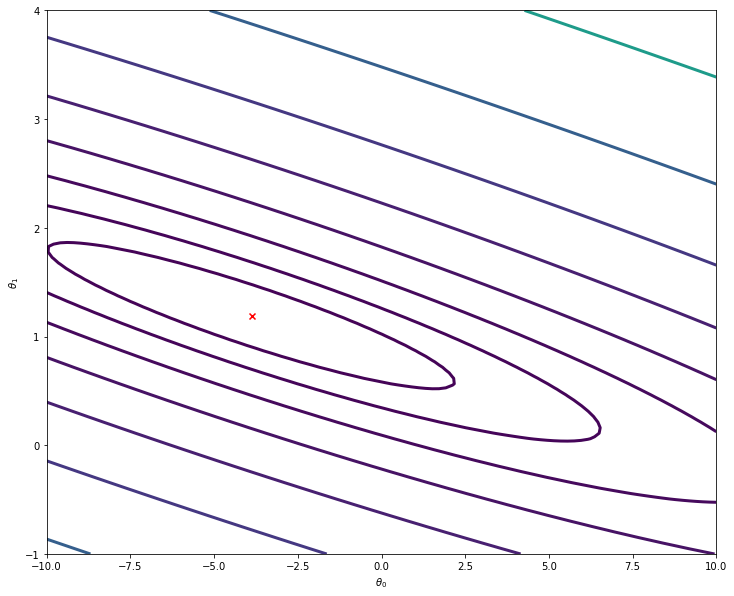

In [169]:
#Run this snippet before moving on to the next parts
#Don't change anything in this code snippet. But do look through it to see what it's doing.

import numpy as np
import matplotlib
from pylab import *

#I'm just going to run gradient descent to get the best-fit theta values
thetas = np.zeros((2,1))
retthetas, retJ_hist = gradientDescentVectorized(X_mod, y, thetas, 0.01, 3000)

def plotCostFunction(X, y, bestthetas):

#Generate a bunch of theta0 and theta1 values on a linear scale
    theta0comb = np.linspace(-10, 10, 100);
    theta1comb = np.linspace(-1, 4, 100);

    #Create a 2D array to store the Jval corresponding to each unique theta0,theta1 pair
    Jvals = np.zeros((len(theta0comb), len(theta1comb)))

    # Compute the costs for each theta0,theta1 pair
    for i in range(len(theta0comb)):
        for j in range(len(theta1comb)):
            Jvals[j,i] = costJ(X, y, np.array([[theta0comb[i]],[theta1comb[j]]]))


    figure(figsize=(12,10))
    xlabel(r'$\theta_0$')
    ylabel(r'$\theta_1$')

    #Draw the contour plot with cost levels that are spaced out logarithmically (for better viewing)
    levels = np.logspace(-2,3,20)#np.array([0,2,6,10,14,20,28,36,46,56])#np.arange(-2, 30, 4)
    contour(theta0comb, theta1comb, Jvals, levels, linewidths=3)

    #Finally, draw on the theta values for which the cost function is minimum with an X
    scatter(bestthetas[0,0], bestthetas[1,0], c='r', marker='x')
    

if sp.shape(X)!= ():
    plotCostFunction(X_mod, y, retthetas)
else:
    printmd("### Something went wrong. Maybe you haven't implemented the steps above correctly/yet? If you're absoutely sure you have done everything above correctly, but you're still seeing this message, contact Dr Ghaziasgar about this.")

# Part 2 - Multivariate Linear Regression

Consider the problem of trying to predict housing prices based on one or more features (as discussed at length in class). In this part we're going to be predicting housing prices based on two features: size and  


### Reading in the Data

I've put in the code below to read in the new data set.

In [170]:
#Run this snippet before moving on to the next parts
#Don't change anything in this code snippet. But do look through it to see what it's doing.

data2 = np.genfromtxt('data2.csv')

The data file consists of three columns. The data is displayed below to demonstrate that it is read in correctly.

In [171]:
data2

array([[2.10400e+03, 3.00000e+00, 3.99900e+05],
       [1.60000e+03, 3.00000e+00, 3.29900e+05],
       [2.40000e+03, 3.00000e+00, 3.69000e+05],
       [1.41600e+03, 2.00000e+00, 2.32000e+05],
       [3.00000e+03, 4.00000e+00, 5.39900e+05],
       [1.98500e+03, 4.00000e+00, 2.99900e+05],
       [1.53400e+03, 3.00000e+00, 3.14900e+05],
       [1.42700e+03, 3.00000e+00, 1.98999e+05],
       [1.38000e+03, 3.00000e+00, 2.12000e+05],
       [1.49400e+03, 3.00000e+00, 2.42500e+05],
       [1.94000e+03, 4.00000e+00, 2.39999e+05],
       [2.00000e+03, 3.00000e+00, 3.47000e+05],
       [1.89000e+03, 3.00000e+00, 3.29999e+05],
       [4.47800e+03, 5.00000e+00, 6.99900e+05],
       [1.26800e+03, 3.00000e+00, 2.59900e+05],
       [2.30000e+03, 4.00000e+00, 4.49900e+05],
       [1.32000e+03, 2.00000e+00, 2.99900e+05],
       [1.23600e+03, 3.00000e+00, 1.99900e+05],
       [2.60900e+03, 4.00000e+00, 4.99998e+05],
       [3.03100e+03, 4.00000e+00, 5.99000e+05],
       [1.76700e+03, 3.00000e+00, 2.5290

Fill in code in the function template below that accepts, as input, ```data2```, and returns the number of data items ```m``` and the number of features ```n```, respectively. This function will be marked.

**[0.5 marks]**

In [172]:
def getMandNPart2(data):
    #Fill in below
    m = data.shape[0] #returns the dimensions of the array of m
    n = data.shape[1]-1 #returns the dimensions of the array of (n) then subtracting (-1)

    #Stop filling in here
    return m,n

m,n = getMandNPart2(data2)

In [173]:
#This cell is for YOU! Use it to check if your function displays
#the right values of m and n, if you wish
getMandNPart2(data2)

(47, 2)

The cell below indicates whether your ```m``` and ```n``` apparently have the correct values at this point.

In [86]:
#If you can see this cell, then interactive feedback
#has not been activated and this cell will most
#likely not work. Please run the very first cell
#at the top of this notebook to activate interactive 
#mode. You may also read through the instructions in
#the very first section right at the top of the
#worksheet which tells you how to run the first cell.
interactive_cell
printmd("***")

m,n = getMandNPart2(data2)
ans = getMandNPart2(data2)
labs = ["m","n"]
corr = [47,2]
pnos = [8,9]

a_fi_t[pnos[0]] = 'a'
a_fi_t[pnos[1]] = 'a'

try:
    for ind,it in enumerate(corr):
        if int(ans[ind])==it:
            printmd("### Your value for "+labs[ind]+" seems correct.")
            a_fi_t[pnos[ind]] = 'b'
        else:
            printmd("### Your value for "+labs[ind]+" seems INCORRECT. Re-visit.")
            a_fi_t[pnos[ind]] = 'a'
except:
    printmd("###Something went wrong. Check your function.")
    
    
    
printmd("***")

***

### Your value for m seems correct.

### Your value for n seems correct.

***

Now write the numpy code below to set variables ```X``` and ```y``` as the first and last columns of the data respectively. You can do this by indexing into the array ```data2```, noting that using a colon "```:```" in place of an index means "all". For example, for an array called A, saying ```A[:,:]``` means all columns and all rows (basically the whole array), and ```A[:,0]``` means all rows of only column index 0. Finally, ```:``` can also be used to specify a range of columns/rows e.g. ```A[1:3,0]``` means row indices 1 and 2 for column 0 only. Once you've set the two variables, display and inspect them to make sure that you've done it correctly.<br><br>Note: When indexing, please ensure that you don't necessarily assume that the price is the 3rd column, but that it is the **last** column (i.e. column number ```n```). Also note that ```X``` should end up having two columns in this case (the first ```n``` columns of the data), but I may use a different data set, in which case it will end up having more or less. Don't assume or hard code anything as regards the number of features.

**[1 mark]**

In [87]:
def getXandyPart2(data,n):
    #Fill in below
    X = data[:,:2] #takes all rows of column index up to 2
    y = data[:,n] #takes column index n
    #Stop filling in here
    return X,y

X,y = getXandyPart2(data2,n)

Now as before, select and run the cell below to see whether your code working correctly. The cell indicates whether you've (apparently) set X and y correctly. Note that if you're running this the first time or if you've cleared all output, the cell below may appear "invisible", but its there: it's just very thin (height-wise). You can click on this cell and use the down arrow to select it. Then run it.

In [88]:
#If you can see this cell, then interactive feedback
#has not been activated and this cell will most
#likely not work. Please run the very first cell
#at the top of this notebook to activate interactive 
#mode. You may also read through the instructions in
#the very first section right at the top of the
#worksheet which tells you how to run the first cell.
interactive_cell
printmd("***")
X,y = getXandyPart2(data2,n)
if type(y)!=type(0):
    y = y.reshape(y.shape[0],1)
ans = getXandyPart2(data2,getMandNPart2(data2)[1])
ans = list(ans)
if type(ans[1])!=type(0):
    ans[1] = ans[1].reshape(ans[ind].shape[0],1)

labs = ["X","y"]
corr = [sp.matrix([[2.104e+03, 3.000e+00], [1.600e+03, 3.000e+00], [2.400e+03, 3.000e+00], [1.416e+03, 2.000e+00], [3.000e+03, 4.000e+00], [1.985e+03, 4.000e+00], [1.534e+03, 3.000e+00], [1.427e+03, 3.000e+00], [1.380e+03, 3.000e+00], [1.494e+03, 3.000e+00], [1.940e+03, 4.000e+00], [2.000e+03, 3.000e+00], [1.890e+03, 3.000e+00], [4.478e+03, 5.000e+00], [1.268e+03, 3.000e+00], [2.300e+03, 4.000e+00], [1.320e+03, 2.000e+00], [1.236e+03, 3.000e+00], [2.609e+03, 4.000e+00], [3.031e+03, 4.000e+00], [1.767e+03, 3.000e+00], [1.888e+03, 2.000e+00], [1.604e+03, 3.000e+00], [1.962e+03, 4.000e+00], [3.890e+03, 3.000e+00], [1.100e+03, 3.000e+00], [1.458e+03, 3.000e+00], [2.526e+03, 3.000e+00], [2.200e+03, 3.000e+00], [2.637e+03, 3.000e+00], [1.839e+03, 2.000e+00], [1.000e+03, 1.000e+00], [2.040e+03, 4.000e+00], [3.137e+03, 3.000e+00], [1.811e+03, 4.000e+00], [1.437e+03, 3.000e+00], [1.239e+03, 3.000e+00], [2.132e+03, 4.000e+00], [4.215e+03, 4.000e+00], [2.162e+03, 4.000e+00], [1.664e+03, 2.000e+00], [2.238e+03, 3.000e+00], [2.567e+03, 4.000e+00], [1.200e+03, 3.000e+00], [8.520e+02, 2.000e+00], [1.852e+03, 4.000e+00], [1.203e+03, 3.000e+00]]),
       sp.matrix([[399900.], [329900.], [369000.], [232000.], [539900.], [299900.], [314900.], [198999.], [212000.], [242500.], [239999.], [347000.], [329999.], [699900.], [259900.], [449900.], [299900.], [199900.], [499998.], [599000.], [252900.], [255000.], [242900.], [259900.], [573900.], [249900.], [464500.], [469000.], [475000.], [299900.], [349900.], [169900.], [314900.], [579900.], [285900.], [249900.], [229900.], [345000.], [549000.], [287000.], [368500.], [329900.], [314000.], [299000.], [179900.], [299900.], [239500.]])]
pnos = [10,11]

a_fi_t[pnos[0]] = 'a'
a_fi_t[pnos[1]] = 'a'

try:
    for ind,it in enumerate(corr):
        if sp.array_equal(it,ans[ind]):
            printmd("### Your value(s) for "+labs[ind]+" seem(s) correct.")
            a_fi_t[pnos[ind]] = 'b'
        else:
            printmd("### Your value(s) for "+labs[ind]+" seem(s) INCORRECT. Re-visit.")
            a_fi_t[pnos[ind]] = 'a'
except:
    printmd("###Something went wrong. Check your function.")
    
    
    
printmd("***")

***

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:28: DeprecationWarning: scipy.array_equal is deprecated and will be removed in SciPy 2.0.0, use numpy.array_equal instead


### Your value(s) for X seem(s) correct.

### Your value(s) for y seem(s) correct.

***

### Feature Scaling

When working with multiple features, feature scaling becomes very important. This is especially so when the ranges of different features differ by orders of magnitude. As discussed in class, feature scaling can be achieved by means of:

$$
x_j^{(i)} = \frac{x_j^{(i)}-\mu_j}{s_j}    \text{ for all $m$ data samples}
$$

where $x_j^{(i)}$ is the $j$th feature of the $i$th data sample, $\mu_j$ is the average/mean value of feature $x_j$ across all the data samples, and $s_j$ is the standard deviation of values of $x_j$ across all the data samples (although the range can also be used - don't use it here).

Below, I've fleshed out a function ```scaleFeatures(X)```. Complete the function to scale the features of the input array ```X```. Note that the input array ```X``` that this function expects **excludes** the extra column of 1s for feature $x_0$ i.e. in your function, assume that ```X``` doesn't have feature $x_0$ which is a column of 1s, and which shouldn't be scaled in any case. The function provides two variables ```mu``` and ```s_stddev``` which are both initialized to $(1\times n)$ row vectors. Put the scaled values of ```X``` inside the ```X_scaled``` array provided in the function. ```X_scaled``` is returned by the function. You could follow the following steps:

For each feature (column):
    
    1. Compute the mean (```mu```) of the feature and store it in the corresponding column entry of variable ```mu``` provided. 
    2. Now subtract the mean value of this column from the entire column and store the result in the corresponding column of ```X_scaled```.
    3. Compute the standard deviation of the feature and store it in the corresponding column entry of variable ```s_stddev``` provided. 
    4. Divide the entire column by this standard deviation and store the result in the corresponding column in ```X_scaled```.

Finally, the function returns ```X_scaled```, but also ```mu``` and ```s_stddev```. These need to be returned so they can be applied to future new test samples that need to first be scaled and then be predicted on with this model. So given some new house size and number of bedrooms, we would need to apply the feature scaling procedure to the sample before passing it through our hypothesis, that has been trained on scaled data, for a price prediction.

Hint: ```numpy```'s ```mean``` and ```std``` functions may be useful here.

While you will be looping through the features/columns, you shouldn't be looping through the individual samples. Rather, use matrix arithmetic to apply feature scaling to all the feature values at the same time e.g. subtracting a numpy array $A$ by a fixed value $b$ results in subtracting every individual item in $A$ by $b$ in one go; this is called "broadcasting". Feel free to look up how broadcasting works in ```numpy```. The same is true of division, multiplication and addition. So consider applying ```mean```, ```std``` and other operations directly to entire columns of ```X``` e.g. ```X[:,0]``` is the entire first column of ```X```.

**[3 marks]**

In [89]:
def scaleFeatures(X):

    X_scaled = np.zeros_like(X)
    mu = np.zeros((1,n))
    s_stddev = np.zeros((1,n))
    
    #Don't change anything above this point.
    #Start filling in below with your feature scaling code. Follow instructions above        
    mu = (1/(X.shape[0]) * (X.sum(axis = 0)))
    s_stddev = X.std(axis=0)
    
    #nested loop
    for i in range(m): #iterate i over m number of times
        for j in range(n): #iterate j over n number of times
            X_scaled[i,j] = ((X[i,j] - mu[j]) / s_stddev[j])
    
    #Stop filling in here. Don't change anything below
    
    return X_scaled, mu, s_stddev

Xscaled, mus, stddevs = scaleFeatures(X)

In [90]:
#This code snippet is for YOU
#It just calls the feature scaling function. Feel free to play around here to see what your function is doing.
Xscaled, mus, stddevs = scaleFeatures(X) #I wouldn't advise changing this

Select and run the cell below to see whether your code working correctly. The cell below indicates whether or not your feature scaling function is apparently working correctly. Note that if you're running this the first time or if you've cleared all output, the cell below may appear "invisible", but its there: it's just very thin (height-wise). You can click on this cell and use the down arrow to select it. Then run it.

In [91]:
#If you can see this cell, then interactive feedback
#has not been activated and this cell will most
#likely not work. Please run the very first cell
#at the top of this notebook to activate interactive 
#mode. You may also read through the instructions in
#the very first section right at the top of the
#worksheet which tells you how to run the first cell.
interactive_cell
printmd("***")

Xscaled, mus, stddevs = scaleFeatures(X)
ans = list(scaleFeatures(X))
if ans[1].size != 0:
    ans[1] = ans[1].reshape(1,ans[1].shape[0])
if ans[2].size != 0:
    ans[2] = ans[2].reshape(1,ans[2].shape[0])
labs = ["the scaled X","mu","standard deviation"]
corr = [
sp.matrix([[ 1.31415422e-01, -2.26093368e-01],[-5.09640698e-01, -2.26093368e-01],[ 5.07908699e-01, -2.26093368e-01],[-7.43677059e-01, -1.55439190e+00],[ 1.27107075e+00,  1.10220517e+00],[-1.99450507e-02,  1.10220517e+00],[-5.93588523e-01, -2.26093368e-01],[-7.29685755e-01, -2.26093368e-01],[-7.89466782e-01, -2.26093368e-01],[-6.44465993e-01, -2.26093368e-01],[-7.71822042e-02,  1.10220517e+00],[-8.65999486e-04, -2.26093368e-01],[-1.40779041e-01, -2.26093368e-01],[ 3.15099326e+00,  2.43050370e+00],[-9.31923697e-01, -2.26093368e-01],[ 3.80715024e-01,  1.10220517e+00],[-8.65782986e-01, -1.55439190e+00],[-9.72625673e-01, -2.26093368e-01],[ 7.73743478e-01,  1.10220517e+00],[ 1.31050078e+00,  1.10220517e+00],[-2.97227261e-01, -2.26093368e-01],[-1.43322915e-01, -1.55439190e+00],[-5.04552951e-01, -2.26093368e-01],[-4.91995958e-02,  1.10220517e+00],[ 2.40309445e+00, -2.26093368e-01],[-1.14560907e+00, -2.26093368e-01],[-6.90255715e-01, -2.26093368e-01],[ 6.68172729e-01, -2.26093368e-01],[ 2.53521350e-01, -2.26093368e-01],[ 8.09357707e-01, -2.26093368e-01],[-2.05647815e-01, -1.55439190e+00],[-1.27280274e+00, -2.88269044e+00],[ 5.00114703e-02,  1.10220517e+00],[ 1.44532608e+00, -2.26093368e-01],[-2.41262044e-01,  1.10220517e+00],[-7.16966387e-01, -2.26093368e-01],[-9.68809863e-01, -2.26093368e-01],[ 1.67029651e-01,  1.10220517e+00],[ 2.81647389e+00,  1.10220517e+00],[ 2.05187753e-01,  1.10220517e+00],[-4.28236746e-01, -1.55439190e+00],[ 3.01854946e-01, -2.26093368e-01],[ 7.20322135e-01,  1.10220517e+00],[-1.01841540e+00, -2.26093368e-01],[-1.46104938e+00, -1.55439190e+00],[-1.89112638e-01,  1.10220517e+00],[-1.01459959e+00, -2.26093368e-01]]),
sp.matrix([[2000.68085106, 3.17021277]]),
sp.matrix([[7.86202619e+02, 7.52842809e-01]])
]
check = [False,False,False]


pno=12
a_fi_t[pno] = 'a'

try:
    for ind,it in enumerate(corr):
        if sp.array_equal(np.round(it,decimals=1),np.round(ans[ind],decimals=1)):
            printmd("### Your value(s) for "+labs[ind]+" seem(s) correct.")
            check[ind]=True
        else:
            printmd("### Your value(s) for "+labs[ind]+" seem(s) INCORRECT. Re-visit.")
            check[ind]=False
    
    if check == [True,True,True]:
        a_fi_t[pno] = 'b'


    #print("c")
except:
    printmd("### Something went wrong. Check your function.")
    
    
    
printmd("***")

***

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:31: DeprecationWarning: scipy.array_equal is deprecated and will be removed in SciPy 2.0.0, use numpy.array_equal instead


### Your value(s) for the scaled X seem(s) correct.

### Your value(s) for mu seem(s) correct.

### Your value(s) for standard deviation seem(s) correct.

***

### Adding Feature $\large x_0$

Here, I'm again going to create a modified ```X``` that includes a columns of 1s that represent feature $x_0$ which will be used in gradient descent lower down in the sheet:

In [92]:
#Run this snippet before moving on to the next parts
#Don't change anything in this code snippet. But do look through it to see what it's doing.
#If Xscaled has been set correctly above
Xscaled_mod = 0
if (np.shape(Xscaled)!=()):
    Xscaled_mod = np.hstack([np.ones((m,1)),Xscaled]) #Add a column of 1s to X which will serve as the so-called x_0 feature


### Gradient Descent for Multiple Features

Now that the features are scaled, we can perform gradient descent for multiple features. You might be very pleased to hear that if you implemented the vectorized version of gradient descent for one variable earlier on, you can simply use that function with more features, and it *should* work. No coding required here. We'll just call the function and it *should* just work. The values you should be seeing below should be $\theta_0 \approx 340413, \theta_1 \approx 109448, \theta_2 \approx -6578$. The cell below will indicate to you whether or not it works, and if it does, returns a vector of the thetas found. Select and run the cell below to see whether your code is apparently working correctly.

Note that if you're running this the first time or if you've cleared all output, the cell below may appear "invisible", but its there: it's just very thin (height-wise). You can click on this cell and use the down arrow to select it. Then run it.

**[2 marks if it works correctly]**

In [93]:
#If you can see this cell, then interactive feedback
#has not been activated and this cell will most
#likely not work. Please run the very first cell
#at the top of this notebook to activate interactive 
#mode. You may also read through the instructions in
#the very first section right at the top of the
#worksheet which tells you how to run the first cell.
interactive_cell
pno = 13
try:
    thetas = sp.zeros((n+1,1)) #Create a column vector of size ((n+1)x1) of zeros i.e. set theta_0, theta_1... theta_n to 0
    retthetas, retJ_hist = gradientDescentVectorized(Xscaled_mod, y, thetas, 1, 1000)  #Don't remove this, but feel free to change the learning rate

    printmd("### Well it ran fine.")
    printmd("### The thetas obtained were: ")
    #retthetas = [[it] for it in retthetas]
    printmd("### " + ",".join([str([round(it[0],3)]) for it in retthetas.tolist()]))

    if round(retthetas[0,0],0) == 340413.0 and round(retthetas[1,0],0) == 109448.0 and round(retthetas[2,0],0)==-6578.0:
        printmd("### Seems like your gradient descent implementation computed the CORRECT theta values with multiple features as well! Well done.")
        a_fi_t[pno] = 'b'
    else:
        printmd("### Seems like your gradient descent implementation computed the INCORRECT theta values with multiple features. Re-visit.")
        a_fi_t[pno] = 'a'

except:
    printmd("### Something went wrong with your gradient descent implementation with multiple features. Maybe it wasn't vectorized correctly. Re-visit.")
    a_fi_t[pno] = 'a'


C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:11: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  # This is added back by InteractiveShellApp.init_path()


### Well it ran fine.

### The thetas obtained were: 

### [340412.66],[109447.796],[-6578.355]

### Seems like your gradient descent implementation computed the CORRECT theta values with multiple features as well! Well done.

### Comparing Learning Rates

Below, I've graciously put in code that plots the cost versus the iteration number of gradient descent for a series of different learning rates. Look at the graphs, feel free to make changes to the learning rates in the ```alphatotry``` list and compare different learning rates for your own information/understanding.

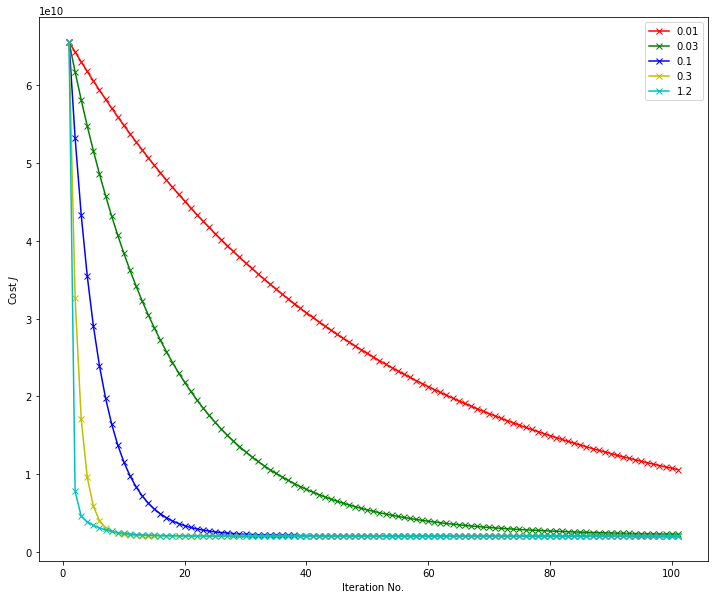

In [94]:
#Don't change anything except variable ``alphatotry`` in this code snippet (unless you really want to). Note that
#you can have up to seven learning rates in the ``alphatotry`` list, which the plot will automatically draw
#and you can then compare. You can, however, have fewer than seven items in the list too.
#But do look through it to see what it's doing.

alphatotry = [0.01, 0.03, 0.1, 0.3, 1.2]

#Don't edit anything below this point (unless you insist on doing so)

import numpy as np
import matplotlib
from pylab import *

def plotLearningRates(X,y,alphas):
    
    plotcol = ['r','g','b','y','c','m','k']

    retJhistforalphas = []
    for alphait in alphas:
        _, retJ_hist = gradientDescentVectorized(X, y, np.array([[0],[0],[0]]), alphait, 100)
        retJhistforalphas.append(retJ_hist)

    xplot = np.linspace(1,len(retJhistforalphas[0]),int(len(retJhistforalphas[0])))

    figure(figsize=(12,10))

    for it, retJhistit in enumerate(retJhistforalphas):
        plot(xplot, np.array(retJhistit), c=plotcol[it], marker='x',label=str(alphas[it]))

    xlabel('Iteration No.')
    ylabel('Cost $ J$')
    legend()
    show()
    
plotLearningRates(Xscaled_mod, y, alphatotry)

### Making a Prediction Using the $\theta$ Obtained

Now that we've obtained a set of values of $\theta$ that best fit this data, we can use it to make predictions. Predict the house prices for the following feature values: [1650, 3]; [1000, 2]; [500; 2]. I've put them into one nice array called ```Xpred``` for you below.

Note that since you scaled your training data before producing your model, it is **critical** for you to first scale these values using the same ```mu``` and ```s_stddev``` values you obtained from your feature scaling function and using the same feature scaling equation given before i.e. e.g. subtract 1650 by the ```mu``` of the size feature and divide it by the ```s_stddev``` of the size feature. Then use the resulting value in your prediction. The training and testing data need to be scaled to the same space. If not, the testing samples will most likely be predicted wrong.

I've split these two actions into two separate functions i.e. ```scaleTestSample``` which takes in ```Xpred``` as well as the ```mu``` and ```s_stddev``` that you obtained on your training set, and is then supposed to scale ```Xpred``` into the same feature space as the training set; ```predictOnTestSample``` which then takes in the scaled version of ```Xpred``` and the $\theta$ parameters of the model obtained using gradient descent, and then makes a prediction on the test sample(s). Remember that a prediction is made by simply computing:

$$\large
h(x)[\text{predicted}] = X_\text{pred}\theta
$$

I've put in code to call the two functions appropriately. All you need to do is to complete both functions to do what is required.

**[1 mark]**

In [95]:
def scaleTestSample(Xpred, mu, stddev):
    #First scale Xpred using mu and s_stddev. You will probably need a loop similar to the one in your feature scaling function
    #But in this case, you won't be computing mu or s_stddev. Rather, you'll be using the my and s_stddev that you obtained
    #from the scaleFeatures function that you called earlier on the training set. Use the my and s_stddev to scale 
    #the features in Xpred
    
    Xpredscaled = Xpred
    
    #Start filling in here: FILL IN scaling code: most likely very similar to the scaleFeatures function
    #Do some stuff to Xpredscaled
    Xpredscaled=((Xpredscaled-mu)/stddev) #setting sub mu from Xpredscaled and div by stddev
    #Stop filling in here
    
    return Xpredscaled #Return a scaled version of Xpred

def predictOnTestSample(Xpred, bestthetas):

    #First add a column of 1s to Xpred as feature x0; don't change this line
    Xpred = np.hstack([np.ones((len(Xpred),1)),Xpred]) #Don't change! Add a column of 1s
    ypred = 0
    
    #Start filling in here: Now make a prediction on Xpred
    #Do some stuff to ypred
    ypred=dot(Xpred, bestthetas) #matrix mul of (Xpred, bestthetas)

    #Stop filling in here
    
    
    return ypred

#Preferably don't change anything below - but it shouldn't affect the feedback cell below
#I'm first calling gradient descent one last time to ensure that we have the ideal thetas to work with
retthetas, retJ_hist = gradientDescentVectorized(Xscaled_mod, y, thetas, 1, 1000)
#Now create the test sample matrix to predict on
Xpred = np.array([[1650.0,3.0],[1000.0,2.0],[500.0,2.0]])
#Scale the test sample
Xpredscaled = scaleTestSample(Xpred,mus,stddevs)
#Then predict the price on the scaled test sample
ypred = predictOnTestSample(Xpredscaled, retthetas)
print("Predicted values:")
print(ypred)

Predicted values:
[[293081.4643349 ]
 [211332.54533577]
 [141727.20832695]]


You should expect to see values of approximately \[293081.5,211332.5,141727.2\]. Select and run the cell below to see whether your code working correctly. The cell below indicates whether or not your prediction was right, and it assumes that you have stored your prediction inside the variable ```ypred```. Note that if you're running this the first time or if you've cleared all output, the cell below may appear "invisible", but its there: it's just very thin (height-wise). You can click on this cell and use the down arrow to select it. Then run it.

In [96]:
#If you can see this cell, then interactive feedback
#has not been activated and this cell will most
#likely not work. Please run the very first cell
#at the top of this notebook to activate interactive 
#mode. You may also read through the instructions in
#the very first section right at the top of the
#worksheet which tells you how to run the first cell.
interactive_cell
pno = 14
printmd("***")
corr = [293081.0,211333.0,141727.0]

a_fi_t[pno] = 'a'
allcorr = True
try:
    for ind,it in enumerate(corr):
        if round(ypred[ind,0],0)==it:
            printmd("### Your prediction of test sample "+str(ind+1)+" seems correct.")
        else:
            printmd("### Your prediction of test sample "+str(ind+1)+" seems INCORRECT. Re-visit.")
            allcorr=False

    if allcorr:
        a_fi_t[pno] = 'b'

except:
    printmd("### Something went wrong. Re-visit.")
        
printmd("***")

***

### Your prediction of test sample 1 seems correct.

### Your prediction of test sample 2 seems correct.

### Your prediction of test sample 3 seems correct.

***

### Using the Normal Equation to Solve for $\Theta$

Now that we've applied and used gradient descent to solve for $\Theta$ algorithmically, now we'll use a different method - the normal equation - to give us the solution in one step. Using the normal equation is a good idea when the number of features/samples is relatively low. If they are too many, it can be too costly to compute, and then we'll have to revert to using gradient descent.

The normal equation is given by:

$$
\large
\Theta = (X^TX)^{-1}X^Ty
$$

It is not necessary to scale features when applying the normal equation so we'll be using the unscaled version of ```X```. Below, I've fleshed out a function that takes in ```X``` and ```y```, and first of all adds a column of 1s to ```X``` to represent feature $x_0$ and stores this as ```Xmod```. Then you need to go ahead and fill the function with the code to compute the solution to $\theta$ using the normal equation using ```Xmod``` and ```y```.

So, just to be clear (but not that it should matter), the function is taking in a matrix ```X``` that **excludes** the column of 1s for feature $x_0$, but then adds them in - the code to do this is already there.

Also, if you do it properly, this shouldn't matter, but just to be clear: your function needs to be returning a matrix of size $(n\times 1)$ with the same format as the ```retthetas``` matrix I've created below. If you don't need ```retthetas```, feel free to remove it.

**[2 marks]**

In [97]:
import numpy.linalg as spla  #You may need this library import. If you don't, remove it.

def solveforTheta(X,y):  #Don't change.
    #First add a column of 1s
    if type(X)!=type(0): #This is just a check I do to make sure you've actually set X above, and it isn't just 0
        Xmod = np.hstack([np.ones((m,1)),X]) #Don't change.
    retthetas = 0
    
    #Start filling in below Fill in code here
    
    transpose_Xmod = np.transpose(Xmod) #transpose
    Xmod_transpose_Xmod = dot(transpose_Xmod, Xmod) #matrix mul
    inverse_Xmod_transpose_Xmod = inv(Xmod_transpose_Xmod) #inverse of Xmod_transpose_Xmod
    
    retthetas = dot(inverse_Xmod_transpose_Xmod, (dot(transpose_Xmod, y))) #matrix mul

    #Stop filling in here
    
    return retthetas

corthetas = solveforTheta(X,y)
print("Solution for thetas:")
print(corthetas)

Solution for thetas:
[[89597.9095428 ]
 [  139.21067402]
 [-8738.01911233]]


Note that the $\theta$ values obtained in the cell above using the normal equation will likely be different to those obtained with gradient descent because you used scaled data with gradient descent whereas the raw (unscaled) data was used with the normal equation here. You should expect to get $\theta_0 \approx 89597.9$, $\theta_1 \approx  139.2$, $\theta_2 \approx -8738.0$

The cell below indicates whether you're apparently computing the $\theta$s correctly. Select and run the cell below to see whether your code working correctly. Note that if you're running this the first time or if you've cleared all output, the cell below may appear "invisible", but its there: it's just very thin (height-wise). You can click on this cell and use the down arrow to select it. Then run it.

In [98]:
#If you can see this cell, then interactive feedback
#has not been activated and this cell will most
#likely not work. Please run the very first cell
#at the top of this notebook to activate interactive 
#mode. You may also read through the instructions in
#the very first section right at the top of the
#worksheet which tells you how to run the first cell.
interactive_cell
pno = 15
printmd("***")

retthetas = solveforTheta(X,y)

thcorr = [89598.0,139.0,-8738.0]

try:

    a_fi_t[pno] = 'a'
    allcorr = True
    for ind,it in enumerate(thcorr):
        if round(retthetas[ind,0],0)==it:
            printmd("### Your computation of theta"+str(ind)+" seems correct.")
        else:
            printmd("### Your computation of theta"+str(ind)+" seems INCORRECT. Re-visit.")
            allcorr=False

    if allcorr:
        a_fi_t[pno] = 'b'

except:
    printmd("### Something went wrong. Re-visit.")
    
printmd("***")

***

### Your computation of theta0 seems correct.

### Your computation of theta1 seems correct.

### Your computation of theta2 seems correct.

***

### Making a Prediction

As before, now that you've found the best-fit $\theta$ values, you can use them to make a prediction on the model. I've again provided you with the matrix ```Xpred``` with the test samples you need to predict on. Since no feature scaling was required or carried out here, there's no need to scale these values to predict either. The code snippet below simply calls the ```predictOnTestSample``` function that you created before, and it should just work if you coded that function correctly. That will mean 1 free mark. Note, also, that although the normal equation was used here, and the data was not scaled and so the $\theta$ values obtained were different to those of gradient descent, the predicted prices end up being the same as those obtained using gradient descent. If this seems strange to you, take some time to give this some thought: keep repeating to yourself: "One was scaled; the other was not"

**[1 mark]**

In [99]:
#Feel free to play around in this snippet: it is for YOU!
retthetas = solveforTheta(X,y)  #I recommend not changing this. You will need the retthetas to make a prediction.

Xpred = np.array([[1650.0,3.0],[1000.0,2.0],[500.0,2.0]]) #Change this if you like, to see what predictions different features will yield

ypred = predictOnTestSample(Xpred, retthetas)

print("Predicted values:")
print(ypred)


Predicted values:
[[293081.4643349 ]
 [211332.54533577]
 [141727.20832696]]


The cell below checks to see if your prediction was right. Select and run the cell to see whether your code working correctly. Note that if you're running this the first time or if you've cleared all output, the cell below may appear "invisible", but its there: it's just very thin (height-wise). You can click on this cell and use the down arrow to select it. Then run it.

In [100]:
#If you can see this cell, then interactive feedback
#has not been activated and this cell will most
#likely not work. Please run the very first cell
#at the top of this notebook to activate interactive 
#mode. You may also read through the instructions in
#the very first section right at the top of the
#worksheet which tells you how to run the first cell.
interactive_cell
pno = 16
printmd("***")
corr = [293081.0,211333.0,141727.0]

try:

    a_fi_t[pno] = 'a'
    ypred = predictOnTestSample(sp.matrix('1650.0 3.0; 1000.0 2.0; 500.0 2.0'), solveforTheta(X,y))
    allcorr = True
    for ind,it in enumerate(corr):
        if round(ypred[ind,0],0)==it:
            printmd("### Your prediction of test sample "+str(ind+1)+" seems correct.")
        else:
            printmd("### Your prediction of test sample "+str(ind+1)+" seems INCORRECT. Re-visit.")
            allcorr=False

    if allcorr:
        a_fi_t[pno] = 'b'

except:
    printmd("### Something went wrong. Re-visit.")    
    
printmd("***")

***

### Your prediction of test sample 1 seems correct.

### Your prediction of test sample 2 seems correct.

### Your prediction of test sample 3 seems correct.

***

### Using sklearn for Linear Regression

It is effortless. The small snippet of code below does **exactly** what we've been doing up to now. Compare the output below to the output of the normal equation above and see if it looks familiar. Analyze the code below to determine how one can get the $\theta$ using sklearn for yourself.

Hint: Remember that $\theta_0$ is actually the y-intercept of the hypothesis.

In [101]:
#Run this snippet just to see what it does. You may also play around with it if you want

import sklearn.linear_model as lm
model = lm.LinearRegression()
try:
    model.fit(X,y)
    print("The y-intercept i.e. theta0 is " + str(model.intercept_))
    print("The coefficients i.e. theta1, theta2 are " + str(model.coef_))
except:
    printmd("### Something went wrong. Re-visit.")
    printmd("***")


The y-intercept i.e. theta0 is [89597.9095428]
The coefficients i.e. theta1, theta2 are [[  139.21067402 -8738.01911233]]


Note that since we didn't use any scaling, these $\theta$ values we get here are the same as those obtained using the normal equation.

In [102]:
# If you can see this cell, then interactive feedback
#has not been activated and this cell will most
#likely not work. Please run the very first cell
#at the top of this notebook to activate interactive 
#mode. You may also read through the instructions in
#the very first section right at the top of the
#worksheet which tells you how to run the first cell.
interactive_cell
printmd("***")
printmd("**DONE**")
ww = [8,8,33,33,383,233,483,233,8,8,33,33,283,183,83,183,83]
bba = [it*int(ord(a_fi_t[ind])-97) for ind,it in enumerate(ww)]
printmd("");printmd("");printmd("")
printmd("<font size='0.5' color='black'>Notebook metrics:</font>")
printmd("<font size='0.5' color='black'>" + ",".join([str(it) for it in bba]) + "</font>")

***

**DONE**

<font size='0.5' color='black'>Notebook metrics:</font>

<font size='0.5' color='black'>8,8,33,33,383,233,483,233,8,8,33,33,283,183,83,183,83</font>